In [1]:
# Upper-Confidence-Bound Action Selection, Figure 2.4

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress=True)

In [3]:
def environment():
    """Returns values and states for 1000 timesteps."""
    values = np.random.normal(size = 10)
    states = np.array([np.random.normal(values) for t in range(1000)])
    return values, states

In [4]:
def agent():
    """Initiates estimated values and action counts."""
    Q = np.zeros(10)
    N = np.zeros(10)
    return Q, N

In [5]:
def greedy(Q):
    """Picks most valuable action with random tiebreak."""
    best_choices = np.flatnonzero(Q == Q.max())
    greedy_choice = np.random.choice(best_choices)
    return greedy_choice

In [6]:
def explore(Q):
    """Picks a random action."""
    explore_choice = np.random.choice(np.arange(Q.size))
    return explore_choice

In [7]:
def epsilon_greedy(Q, epsilon):
    """Picks a random action with epsilon probabilty. Greedy otherwise."""
    options = ['greedy', 'explore']
    probabilities = [1 - epsilon, epsilon]
    choice = np.random.choice(options, p = probabilities)
    
    if choice == 'greedy':
        return greedy(Q)
    elif choice == 'explore':
        return explore(Q)

In [8]:
def UCB(Q, N, t, c = 2):
    """Selects non-greedy actions according to potential of being optimal."""
    if 0.0 in N:
        UCB_choice = greedy(Q)
    else:
        UCB_choice = np.argmax(Q + (c * np.sqrt(np.log(t) / N)))
    return UCB_choice

In [9]:
def learn(Q, A, R, N):
    """Updates value estimate using the sample-average method."""
    N[A] = N[A] + 1
    Q[A] = Q[A] + (R - Q[A]) / N[A]
    return Q, N

In [10]:
def run(runs, epsilon = False):
    """Return average behavior given epsilon and number of runs."""
    rewards = np.zeros((runs, 1000))

    for run in range(runs):
        values, states = environment()
        Q, N = agent()

        for t, state in enumerate(states):
            if epsilon == False:
                A = UCB(Q, N, t)
            else:
                A = epsilon_greedy(Q, epsilon)
                
            R = state[A]
            Q, N = learn(Q, A, R, N)

            rewards[run, t] = R
            
    avg_rewards = rewards.mean(axis = 0)
    return avg_rewards

In [11]:
# running for UCB and epsilon greedy

runs = 2000

first = run(runs, 0.1); print('First run complete.')
second = run(runs); print('Second run complete.') # c = 2

First run complete.
Second run complete.


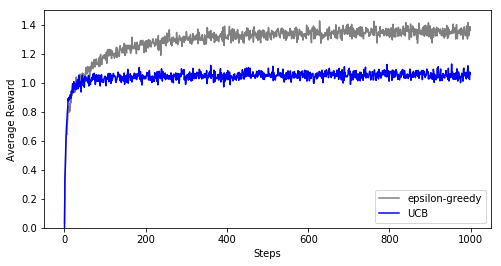

In [12]:
# plotting the results

plt.figure(figsize = (8, 4))
plt.plot(first, color = 'grey', label = 'epsilon-greedy')
plt.plot(second, color = 'blue', label = 'UCB')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.ylim(bottom = 0)
plt.legend()

plt.show()